## **`Necessary imports`**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

## **`Mounting drive`**

In [88]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# **`Task - 1`**

## **`Reading train.txt file`**

In [89]:
columns = ["X1", "X2", "Y"]
train = pd.read_csv("/gdrive/MyDrive/Pattern_Recognition/KNN/train_knn.txt", header=None)
train.columns = columns
train

,X1,X2,Y
0,7,7,1
1,7,4,1
2,6,4,1
3,7,5,1
4,7,6,1
5,6,7,1
6,6,6,1
7,3,4,2
8,2,3,2
9,3,2,2


## **`Plotting data samples`**

In [90]:
def plot_data(train, suffix, all_data = False):  
  
  plt.figure(figsize=(10,10))

  X = list(train["X1"])
  Y = list(train["X2"])
  class_ = list(train["Y"])

  for i in range(len(X)):
    if class_[i] == 1:
      plt.plot(X[i], Y[i], "bo")
    elif class_[i] == 2:
      plt.plot(X[i], Y[i], "r*")
    else:
      plt.plot(X[i], Y[i], "gv")

  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.title("The "+suffix+" data samples distribution")

  Good = mpatches.Patch(color="red", label = "Good")
  Bad = mpatches.Patch(color="blue", label = "Bad")
  if all_data:
    Unclassified = mpatches.Patch(color="green", label = "Unclassified")
    plt.legend(handles = [Good, Bad, Unclassified])
  else:
    plt.legend(handles = [Good, Bad])
  plt.show()

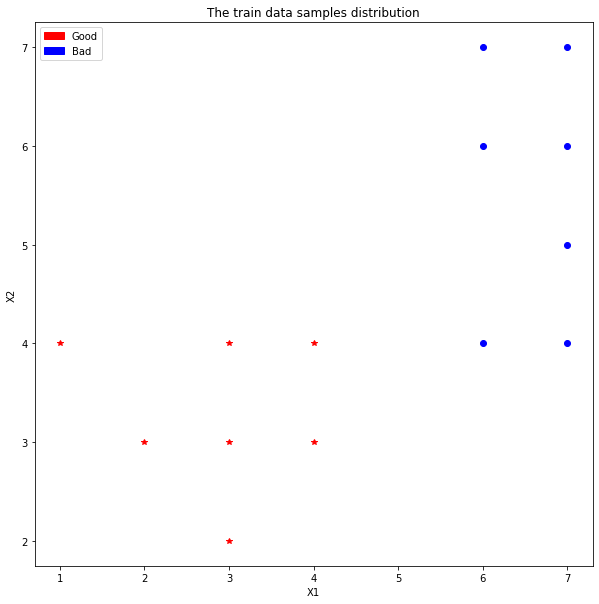

In [91]:
plot_data(train, "train")

## **`Number of nearest neighbors`**

In [92]:
neighbors = int(input("Enter Neighbor numbers:"))

Enter Neighbor numbers:5


## **`Reading the test file`**

In [93]:
test = pd.read_csv("/gdrive/MyDrive/Pattern_Recognition/KNN/test_knn.txt")
test.columns = columns[:2]
test
test["Y"] = 0

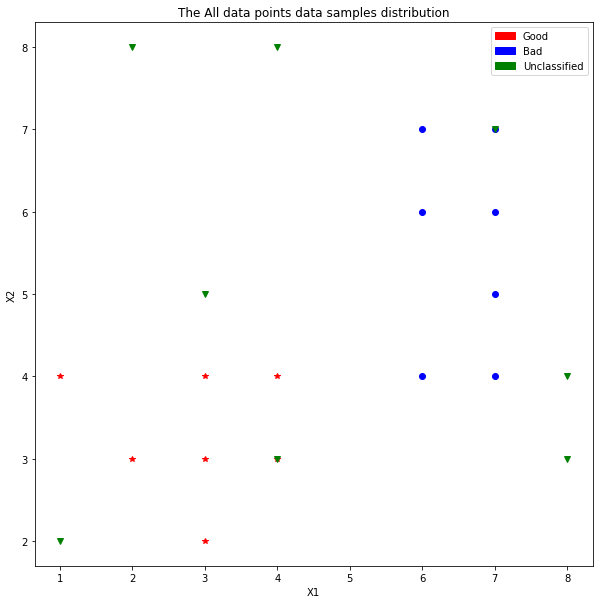

In [94]:
all = pd.concat([train, test])
plot_data(all, "All data points", all_data = True)

# **`Task - 2, 3`**

## **`Creating prediction.txt file`**

In [95]:
predictions = open("/gdrive/MyDrive/Pattern_Recognition/KNN/prediction.txt", "w+")

## **`K-Nearest Neighbors`**

In [96]:
def KNN(train, test, path):

  for i in range(len(test)):

    predictions = open(path, "a+")
    
    predictions.write("Test point:"+str(test["X1"].iloc[i])+","+str(test["X2"].iloc[i])+"\n")

    result = []
    result.extend( (test["X1"].iloc[i]-train["X1"].iloc[j])**2+(test["X2"].iloc[i]-train["X2"].iloc[j])**2 for j in range(len(train)))
    result = np.array(result)
    result_index = np.argsort(result)
    # print(f"Distance: {result}")
    # print(f"Index: {result_index}"+"\n")

    Good = 0
    Bad = 0

    for k in range(neighbors):
      predictions.write("Distance "+str(k+1)+":"+str(result[result_index[k]])+"    "+"Class:"+str(train["Y"].iloc[result_index[k]])+"\n")
      if train["Y"].iloc[result_index[k]] == 1:
        Good += 1
      else:
        Bad += 1
    
    if Good>Bad:
      test["Y"].iloc[i] = 1
    else:
      test["Y"].iloc[i] = 2
    
    predictions.write("Predicted class: "+str(test["Y"].iloc[i])+"\n\n")

    predictions.close()

  return test

In [97]:
path = "/gdrive/MyDrive/Pattern_Recognition/KNN/prediction.txt"
KNN(train, test, path)

,X1,X2,Y
0,7,7,1
1,4,3,2
2,2,8,2
3,3,5,2
4,1,2,2
5,4,8,1
6,8,3,1
7,8,4,1


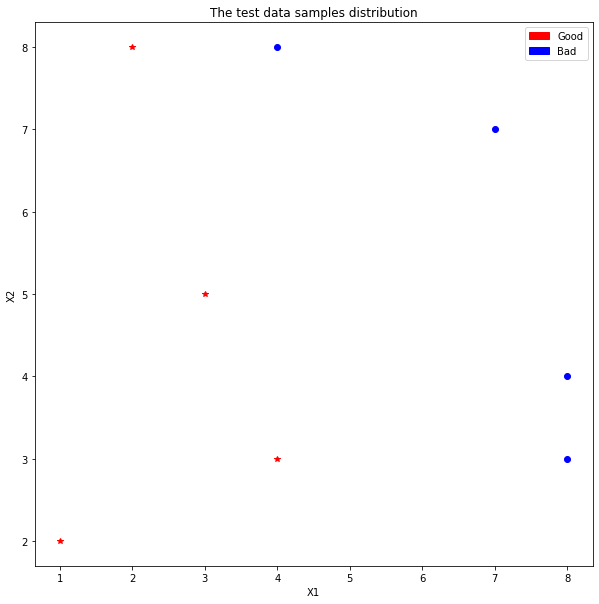

In [98]:
plot_data(test, "test")

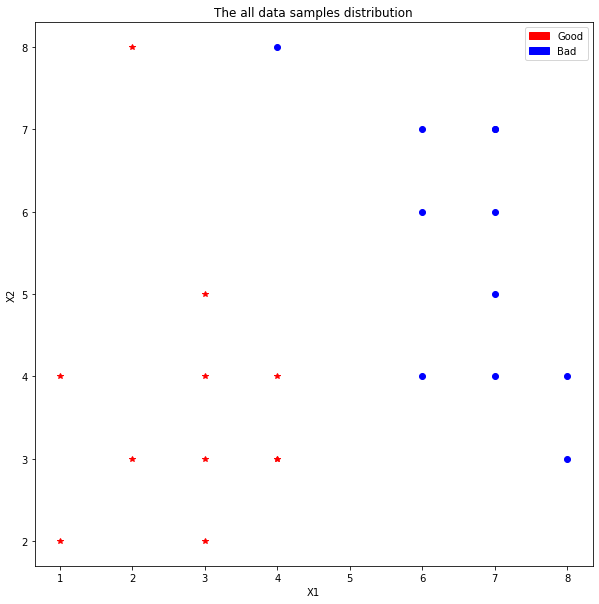

In [99]:
all_classified = pd.concat([train, test])
plot_data(all_classified, "all")

# **`Task - 3`**

## **`Viewing the predicition.txt file`**

In [100]:
predictions = open(path, "r")
with open(path) as predicitions:
  [print(line) for line in predictions.readlines()]

Test point:7,7

Distance 1:0    Class:1

Distance 2:1    Class:1

Distance 3:1    Class:1

Distance 4:2    Class:1

Distance 5:4    Class:1

Predicted class: 1



Test point:4,3

Distance 1:0    Class:2

Distance 2:1    Class:2

Distance 3:1    Class:2

Distance 4:2    Class:2

Distance 5:2    Class:2

Predicted class: 2



Test point:2,8

Distance 1:17    Class:1

Distance 2:17    Class:2

Distance 3:17    Class:2

Distance 4:20    Class:1

Distance 5:20    Class:2

Predicted class: 2



Test point:3,5

Distance 1:1    Class:2

Distance 2:2    Class:2

Distance 3:4    Class:2

Distance 4:5    Class:2

Distance 5:5    Class:2

Predicted class: 2



Test point:1,2

Distance 1:2    Class:2

Distance 2:4    Class:2

Distance 3:4    Class:2

Distance 4:5    Class:2

Distance 5:8    Class:2

Predicted class: 2



Test point:4,8

Distance 1:5    Class:1

Distance 2:8    Class:1

Distance 3:10    Class:1

Distance 4:13    Class:1

Distance 5:16    Class:2

Predicted class: 1



Test point:8,3